In [14]:
from tensorflow.keras import callbacks
from keras import backend

In [15]:
#import tensorflow.keras.callbacks.Callback as Callback
# define custom learning rate schedule
from math import *
class CosineAnnealingLearningRateSchedule(callbacks.Callback):
    # constructor
    def __init__(self, n_epochs, n_cycles, lrate_max, verbose=0):
        self.epochs = n_epochs
        self.cycles = n_cycles
        self.lr_max = lrate_max
        self.lrates = list()
 
 # calculate learning rate for an epoch
    def cosine_annealing(self, epoch, n_epochs, n_cycles, lrate_max):
        epochs_per_cycle = floor(n_epochs/n_cycles)
        cos_inner = (pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
        return lrate_max/2 * (cos(cos_inner) + 1)
 
 # calculate and set learning rate at the start of the epoch
    def on_epoch_begin(self, epoch, logs=None):
    # calculate learning rate
        lr = self.cosine_annealing(epoch, self.epochs, self.cycles, self.lr_max)
        # set learning rate
        backend.set_value(self.model.optimizer.lr, lr)
        # log value
        self.lrates.append(lr)

In [25]:
# define learning rate callback
n_epochs = 600
n_cycles = n_epochs / 50
ca = CosineAnnealingLearningRateSchedule(n_epochs, n_cycles, 0.01)

In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
df = pd.read_csv('Onion.csv')
# Select relevant features for training
features = ['AvgTemp', 'AvgHumidity', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
# Extract features and target variable
X = df[features]
y = df['Yield']
outlier_indices = np.where(y>40) 
y= y.drop(outlier_indices[0])
X=X.drop(outlier_indices[0])
# Normalize numerical features
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3,random_state=21)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
#from keras.losses import mean_squared_error
#import keras.backend as K
# load the dataset
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
#X = dataset[:,0:8]
#y = dataset[:,8]
# define the keras model
#def root_mean_squared_error(y_true, y_pred):
#    return K.sqrt(mean_squared_error(y_true, y_pred))

model = Sequential()

#odel.add(Dropout(0.2))
model.add(Dense(50, input_shape=(5,), activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))

#odel.add(Dropout(0.3))
model.add(Dense(25,activation='relu',kernel_initializer='he_normal'))

model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(1,activation='sigmoid'))
# compile the keras model
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error',optimizer=Adam(), metrics=[RootMeanSquaredError()])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=n_epochs,callbacks=[ca])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
#y_pred=model.predict(X_test)
# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/600
6/6 [==============================] - 1s 2ms/step - loss: 153.3088 - root_mean_squared_error: 12.3818
Epoch 2/600
6/6 [==============================] - 0s 2ms/step - loss: 57.4242 - root_mean_squared_error: 7.5779
Epoch 3/600
6/6 [==============================] - 0s 2ms/step - loss: 52.0794 - root_mean_squared_error: 7.2166
Epoch 4/600
6/6 [==============================] - 0s 2ms/step - loss: 53.9927 - root_mean_squared_error: 7.3480
Epoch 5/600
6/6 [==============================] - 0s 2ms/step - loss: 47.2370 - root_mean_squared_error: 6.8729
Epoch 6/600
6/6 [==============================] - 0s 2ms/step - loss: 43.2777 - root_mean_squared_error: 6.5786
Epoch 7/600
6/6 [==============================] - 0s 1ms/step - loss: 38.3644 - root_mean_squared_error: 6.1939
Epoch 8/600
6/6 [==============================] - 0s 1ms/step - loss: 31.7816 - root_mean_squared_error: 5.6375
Epoch 9/600
6/6 [==============================] - 0s 1ms/step - loss: 28.5213 - root_mean_squ

6/6 [==============================] - 0s 2ms/step - loss: 12.6276 - root_mean_squared_error: 3.5535
Epoch 73/600
6/6 [==============================] - 0s 2ms/step - loss: 14.1700 - root_mean_squared_error: 3.7643
Epoch 74/600
6/6 [==============================] - 0s 1ms/step - loss: 16.1725 - root_mean_squared_error: 4.0215
Epoch 75/600
6/6 [==============================] - 0s 1ms/step - loss: 15.9861 - root_mean_squared_error: 3.9983
Epoch 76/600
6/6 [==============================] - 0s 1ms/step - loss: 17.4980 - root_mean_squared_error: 4.1831
Epoch 77/600
6/6 [==============================] - 0s 1ms/step - loss: 15.4947 - root_mean_squared_error: 3.9363
Epoch 78/600
6/6 [==============================] - 0s 1ms/step - loss: 13.3478 - root_mean_squared_error: 3.6535
Epoch 79/600
6/6 [==============================] - 0s 1ms/step - loss: 12.4473 - root_mean_squared_error: 3.5281
Epoch 80/600
6/6 [==============================] - 0s 1ms/step - loss: 11.2733 - root_mean_squared_e

6/6 [==============================] - 0s 2ms/step - loss: 6.3604 - root_mean_squared_error: 2.5220
Epoch 144/600
6/6 [==============================] - 0s 1ms/step - loss: 6.3400 - root_mean_squared_error: 2.5179
Epoch 145/600
6/6 [==============================] - 0s 2ms/step - loss: 6.2617 - root_mean_squared_error: 2.5023
Epoch 146/600
6/6 [==============================] - 0s 1ms/step - loss: 6.2308 - root_mean_squared_error: 2.4962
Epoch 147/600
6/6 [==============================] - 0s 1ms/step - loss: 6.2095 - root_mean_squared_error: 2.4919
Epoch 148/600
6/6 [==============================] - 0s 2ms/step - loss: 6.1996 - root_mean_squared_error: 2.4899
Epoch 149/600
6/6 [==============================] - 0s 2ms/step - loss: 6.1937 - root_mean_squared_error: 2.4887
Epoch 150/600
6/6 [==============================] - 0s 1ms/step - loss: 6.1872 - root_mean_squared_error: 2.4874
Epoch 151/600
6/6 [==============================] - 0s 2ms/step - loss: 8.0479 - root_mean_squared_er

6/6 [==============================] - 0s 3ms/step - loss: 7.1438 - root_mean_squared_error: 2.6728
Epoch 215/600
6/6 [==============================] - 0s 3ms/step - loss: 5.4268 - root_mean_squared_error: 2.3295
Epoch 216/600
6/6 [==============================] - 0s 3ms/step - loss: 6.3323 - root_mean_squared_error: 2.5164
Epoch 217/600
6/6 [==============================] - 0s 2ms/step - loss: 6.3668 - root_mean_squared_error: 2.5233
Epoch 218/600
6/6 [==============================] - 0s 2ms/step - loss: 6.1775 - root_mean_squared_error: 2.4855
Epoch 219/600
6/6 [==============================] - 0s 2ms/step - loss: 9.1796 - root_mean_squared_error: 3.0298
Epoch 220/600
6/6 [==============================] - 0s 3ms/step - loss: 7.5440 - root_mean_squared_error: 2.7466
Epoch 221/600
6/6 [==============================] - 0s 3ms/step - loss: 5.6191 - root_mean_squared_error: 2.3705
Epoch 222/600
6/6 [==============================] - 0s 2ms/step - loss: 4.7590 - root_mean_squared_er

6/6 [==============================] - 0s 4ms/step - loss: 2.0077 - root_mean_squared_error: 1.4169
Epoch 286/600
6/6 [==============================] - 0s 3ms/step - loss: 1.9805 - root_mean_squared_error: 1.4073
Epoch 287/600
6/6 [==============================] - 0s 2ms/step - loss: 1.9072 - root_mean_squared_error: 1.3810
Epoch 288/600
6/6 [==============================] - 0s 3ms/step - loss: 1.8560 - root_mean_squared_error: 1.3624
Epoch 289/600
6/6 [==============================] - 0s 3ms/step - loss: 1.8404 - root_mean_squared_error: 1.3566
Epoch 290/600
6/6 [==============================] - 0s 3ms/step - loss: 1.8114 - root_mean_squared_error: 1.3459
Epoch 291/600
6/6 [==============================] - 0s 2ms/step - loss: 1.8017 - root_mean_squared_error: 1.3423
Epoch 292/600
6/6 [==============================] - 0s 2ms/step - loss: 1.8036 - root_mean_squared_error: 1.3430
Epoch 293/600
6/6 [==============================] - 0s 2ms/step - loss: 1.7695 - root_mean_squared_er

Epoch 357/600
6/6 [==============================] - 0s 2ms/step - loss: 4.7978 - root_mean_squared_error: 2.1904
Epoch 358/600
6/6 [==============================] - 0s 3ms/step - loss: 7.1290 - root_mean_squared_error: 2.6700
Epoch 359/600
6/6 [==============================] - 0s 3ms/step - loss: 5.4249 - root_mean_squared_error: 2.3291
Epoch 360/600
6/6 [==============================] - 0s 3ms/step - loss: 3.7516 - root_mean_squared_error: 1.9369
Epoch 361/600
6/6 [==============================] - 0s 3ms/step - loss: 4.5430 - root_mean_squared_error: 2.1314
Epoch 362/600
6/6 [==============================] - 0s 4ms/step - loss: 3.1473 - root_mean_squared_error: 1.7741
Epoch 363/600
6/6 [==============================] - 0s 3ms/step - loss: 3.3497 - root_mean_squared_error: 1.8302
Epoch 364/600
6/6 [==============================] - 0s 2ms/step - loss: 4.1398 - root_mean_squared_error: 2.0347
Epoch 365/600
6/6 [==============================] - 0s 3ms/step - loss: 3.7345 - root_m

6/6 [==============================] - 0s 3ms/step - loss: 2.9578 - root_mean_squared_error: 1.7198
Epoch 429/600
6/6 [==============================] - 0s 3ms/step - loss: 2.3955 - root_mean_squared_error: 1.5477
Epoch 430/600
6/6 [==============================] - 0s 3ms/step - loss: 2.4285 - root_mean_squared_error: 1.5584
Epoch 431/600
6/6 [==============================] - 0s 3ms/step - loss: 1.9436 - root_mean_squared_error: 1.3941
Epoch 432/600
6/6 [==============================] - 0s 4ms/step - loss: 1.9233 - root_mean_squared_error: 1.3868
Epoch 433/600
6/6 [==============================] - 0s 3ms/step - loss: 1.6469 - root_mean_squared_error: 1.2833
Epoch 434/600
6/6 [==============================] - 0s 4ms/step - loss: 1.6629 - root_mean_squared_error: 1.2895
Epoch 435/600
6/6 [==============================] - 0s 3ms/step - loss: 1.3020 - root_mean_squared_error: 1.1410
Epoch 436/600
6/6 [==============================] - 0s 3ms/step - loss: 1.2530 - root_mean_squared_er

6/6 [==============================] - 0s 3ms/step - loss: 0.8926 - root_mean_squared_error: 0.9448
Epoch 500/600
6/6 [==============================] - 0s 3ms/step - loss: 0.8918 - root_mean_squared_error: 0.9444
Epoch 501/600
6/6 [==============================] - 0s 3ms/step - loss: 1.2575 - root_mean_squared_error: 1.1214
Epoch 502/600
6/6 [==============================] - 0s 3ms/step - loss: 1.1846 - root_mean_squared_error: 1.0884
Epoch 503/600
6/6 [==============================] - 0s 3ms/step - loss: 1.2264 - root_mean_squared_error: 1.1074
Epoch 504/600
6/6 [==============================] - 0s 3ms/step - loss: 1.4434 - root_mean_squared_error: 1.2014
Epoch 505/600
6/6 [==============================] - 0s 3ms/step - loss: 1.6679 - root_mean_squared_error: 1.2915
Epoch 506/600
6/6 [==============================] - 0s 3ms/step - loss: 1.8881 - root_mean_squared_error: 1.3741
Epoch 507/600
6/6 [==============================] - 0s 3ms/step - loss: 2.5872 - root_mean_squared_er

6/6 [==============================] - 0s 3ms/step - loss: 8.6711 - root_mean_squared_error: 2.9447
Epoch 571/600
6/6 [==============================] - 0s 3ms/step - loss: 7.8939 - root_mean_squared_error: 2.8096
Epoch 572/600
6/6 [==============================] - 0s 3ms/step - loss: 6.4432 - root_mean_squared_error: 2.5383
Epoch 573/600
6/6 [==============================] - 0s 3ms/step - loss: 5.4222 - root_mean_squared_error: 2.3286
Epoch 574/600
6/6 [==============================] - 0s 3ms/step - loss: 4.3786 - root_mean_squared_error: 2.0925
Epoch 575/600
6/6 [==============================] - 0s 4ms/step - loss: 3.9362 - root_mean_squared_error: 1.9840
Epoch 576/600
6/6 [==============================] - 0s 3ms/step - loss: 3.4643 - root_mean_squared_error: 1.8613
Epoch 577/600
6/6 [==============================] - 0s 3ms/step - loss: 3.1342 - root_mean_squared_error: 1.7704
Epoch 578/600
6/6 [==============================] - 0s 3ms/step - loss: 2.4511 - root_mean_squared_er

In [27]:

# snapshot ensemble with custom learning rate schedule
class SnapshotEnsemble(callbacks.Callback):
 # constructor
    def __init__(self, n_epochs, n_cycles, lrate_max, verbose=0):
        self.epochs = n_epochs
        self.cycles = n_cycles
        self.lr_max = lrate_max
        self.lrates = list()
 
 # calculate learning rate for epoch
    def cosine_annealing(self, epoch, n_epochs, n_cycles, lrate_max):
        epochs_per_cycle = floor(n_epochs/n_cycles)
        cos_inner = (pi * (epoch % epochs_per_cycle)) / (epochs_per_cycle)
        return lrate_max/2 * (cos(cos_inner) + 1)
 
 # calculate and set learning rate at the start of the epoch
    def on_epoch_begin(self, epoch, logs={}):
        # calculate learning rate
        lr = self.cosine_annealing(epoch, self.epochs, self.cycles, self.lr_max)
        # set learning rate
        backend.set_value(self.model.optimizer.lr, lr)
        # log value
        self.lrates.append(lr)
 
 # save models at the end of each cycle
    def on_epoch_end(self, epoch, logs={}):
        # check if we can save model
        epochs_per_cycle = floor(self.epochs / self.cycles)
        if epoch != 0 and (epoch + 1) % epochs_per_cycle == 0:
            # save model to file
            filename = "snapshot_model_%d.h5" % int((epoch + 1) / epochs_per_cycle)
            self.model.save(filename)
            print('>saved snapshot %s, epoch %d' % (filename, epoch))

In [28]:
n_epochs = 500
n_cycles = n_epochs / 50
ca = SnapshotEnsemble(n_epochs, n_cycles, 0.01)

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
#from keras.losses import mean_squared_error
#import keras.backend as K
# load the dataset
#dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
#X = dataset[:,0:8]
#y = dataset[:,8]
# define the keras model
#def root_mean_squared_error(y_true, y_pred):
#    return K.sqrt(mean_squared_error(y_true, y_pred))

model = Sequential()

#odel.add(Dropout(0.2))
model.add(Dense(50, input_shape=(5,), activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))

model.add(Dense(50, activation='relu',kernel_initializer='he_normal'))

model.add(Dense(50, activation='relu',kernel_initializer='he_uniform'))

#odel.add(Dropout(0.3))
model.add(Dense(25,activation='relu',kernel_initializer='he_normal'))

model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(1,activation='sigmoid'))
# compile the keras model
#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error',optimizer=Adam(), metrics=[RootMeanSquaredError()])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=n_epochs,callbacks=[ca])
# evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
#y_pred=model.predict(X_test)
# evaluate the keras model
#_, accuracy = model.evaluate(X, y)
#print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 125.7771 - root_mean_squared_error: 11.2150
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 55.3572 - root_mean_squared_error: 7.4402
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 44.5658 - root_mean_squared_error: 6.6758
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 44.1290 - root_mean_squared_error: 6.6430
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 39.9720 - root_mean_squared_error: 6.3223
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 31.6683 - root_mean_squared_error: 5.6275
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 30.2882 - root_mean_squared_error: 5.5035
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 29.3214 - root_mean_squared_error: 5.4149
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 26.5842 - root_mean_squ

D:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 60/500
6/6 [==============================] - 0s 2ms/step - loss: 22.6307 - root_mean_squared_error: 4.7572
Epoch 61/500
6/6 [==============================] - 0s 2ms/step - loss: 19.3179 - root_mean_squared_error: 4.3952
Epoch 62/500
6/6 [==============================] - 0s 2ms/step - loss: 20.0632 - root_mean_squared_error: 4.4792
Epoch 63/500
6/6 [==============================] - 0s 1ms/step - loss: 18.5449 - root_mean_squared_error: 4.3064
Epoch 64/500
6/6 [==============================] - 0s 2ms/step - loss: 18.8526 - root_mean_squared_error: 4.3420
Epoch 65/500
6/6 [==============================] - 0s 2ms/step - loss: 15.6883 - root_mean_squared_error: 3.9608
Epoch 66/500
6/6 [==============================] - 0s 2ms/step - loss: 17.7202 - root_mean_squared_error: 4.2095
Epoch 67/500
6/6 [==============================] - 0s 1ms/step - loss: 15.9416 - root_mean_squared_error: 3.9927
Epoch 68/500
6/6 [==============================] - 0s 2ms/step - loss: 18.4215 - root_m

6/6 [==============================] - 0s 2ms/step - loss: 8.0675 - root_mean_squared_error: 2.8403
Epoch 131/500
6/6 [==============================] - 0s 2ms/step - loss: 8.4907 - root_mean_squared_error: 2.9139
Epoch 132/500
6/6 [==============================] - 0s 1ms/step - loss: 7.1470 - root_mean_squared_error: 2.6734
Epoch 133/500
6/6 [==============================] - 0s 1ms/step - loss: 7.2348 - root_mean_squared_error: 2.6898
Epoch 134/500
6/6 [==============================] - 0s 1ms/step - loss: 6.9323 - root_mean_squared_error: 2.6329
Epoch 135/500
6/6 [==============================] - 0s 1ms/step - loss: 7.0452 - root_mean_squared_error: 2.6543
Epoch 136/500
6/6 [==============================] - 0s 2ms/step - loss: 7.2598 - root_mean_squared_error: 2.6944
Epoch 137/500
6/6 [==============================] - 0s 2ms/step - loss: 7.3092 - root_mean_squared_error: 2.7035
Epoch 138/500
6/6 [==============================] - 0s 2ms/step - loss: 6.6547 - root_mean_squared_er

6/6 [==============================] - 0s 7ms/step - loss: 5.0159 - root_mean_squared_error: 2.2396
Epoch 201/500
6/6 [==============================] - 0s 4ms/step - loss: 6.1056 - root_mean_squared_error: 2.4710
Epoch 202/500
6/6 [==============================] - 0s 3ms/step - loss: 5.4811 - root_mean_squared_error: 2.3412
Epoch 203/500
6/6 [==============================] - 0s 3ms/step - loss: 7.3873 - root_mean_squared_error: 2.7180
Epoch 204/500
6/6 [==============================] - 0s 3ms/step - loss: 9.2980 - root_mean_squared_error: 3.0493
Epoch 205/500
6/6 [==============================] - 0s 2ms/step - loss: 12.4206 - root_mean_squared_error: 3.5243
Epoch 206/500
6/6 [==============================] - 0s 2ms/step - loss: 11.6839 - root_mean_squared_error: 3.4182
Epoch 207/500
6/6 [==============================] - 0s 2ms/step - loss: 11.9967 - root_mean_squared_error: 3.4636
Epoch 208/500
6/6 [==============================] - 0s 3ms/step - loss: 13.8913 - root_mean_square

6/6 [==============================] - 0s 3ms/step - loss: 5.2066 - root_mean_squared_error: 2.2818
Epoch 270/500
6/6 [==============================] - 0s 3ms/step - loss: 3.8452 - root_mean_squared_error: 1.9609
Epoch 271/500
6/6 [==============================] - 0s 3ms/step - loss: 3.9683 - root_mean_squared_error: 1.9921
Epoch 272/500
6/6 [==============================] - 0s 3ms/step - loss: 3.8950 - root_mean_squared_error: 1.9736
Epoch 273/500
6/6 [==============================] - 0s 3ms/step - loss: 3.8454 - root_mean_squared_error: 1.9610
Epoch 274/500
6/6 [==============================] - 0s 3ms/step - loss: 5.0166 - root_mean_squared_error: 2.2398
Epoch 275/500
6/6 [==============================] - 0s 4ms/step - loss: 5.2069 - root_mean_squared_error: 2.2819
Epoch 276/500
6/6 [==============================] - 0s 3ms/step - loss: 7.6486 - root_mean_squared_error: 2.7656
Epoch 277/500
6/6 [==============================] - 0s 3ms/step - loss: 5.5600 - root_mean_squared_er

6/6 [==============================] - 0s 3ms/step - loss: 1.0912 - root_mean_squared_error: 1.0446
Epoch 340/500
6/6 [==============================] - 0s 2ms/step - loss: 1.0651 - root_mean_squared_error: 1.0321
Epoch 341/500
6/6 [==============================] - 0s 3ms/step - loss: 1.0379 - root_mean_squared_error: 1.0188
Epoch 342/500
6/6 [==============================] - 0s 2ms/step - loss: 1.0224 - root_mean_squared_error: 1.0111
Epoch 343/500
6/6 [==============================] - 0s 3ms/step - loss: 1.0101 - root_mean_squared_error: 1.0050
Epoch 344/500
6/6 [==============================] - 0s 3ms/step - loss: 1.0027 - root_mean_squared_error: 1.0013
Epoch 345/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9943 - root_mean_squared_error: 0.9971
Epoch 346/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9893 - root_mean_squared_error: 0.9946
Epoch 347/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9856 - root_mean_squared_er

6/6 [==============================] - 0s 3ms/step - loss: 1.6053 - root_mean_squared_error: 1.2670
Epoch 409/500
6/6 [==============================] - 0s 3ms/step - loss: 1.9094 - root_mean_squared_error: 1.3818
Epoch 410/500
6/6 [==============================] - 0s 3ms/step - loss: 2.2574 - root_mean_squared_error: 1.5025
Epoch 411/500
6/6 [==============================] - 0s 3ms/step - loss: 2.1851 - root_mean_squared_error: 1.4782
Epoch 412/500
6/6 [==============================] - 0s 3ms/step - loss: 2.0186 - root_mean_squared_error: 1.4208
Epoch 413/500
6/6 [==============================] - 0s 3ms/step - loss: 1.8985 - root_mean_squared_error: 1.3779
Epoch 414/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7897 - root_mean_squared_error: 1.3378
Epoch 415/500
6/6 [==============================] - 0s 3ms/step - loss: 1.9218 - root_mean_squared_error: 1.3863
Epoch 416/500
6/6 [==============================] - 0s 3ms/step - loss: 1.5577 - root_mean_squared_er

6/6 [==============================] - 0s 2ms/step - loss: 5.1297 - root_mean_squared_error: 2.2649
Epoch 479/500
6/6 [==============================] - 0s 3ms/step - loss: 4.9800 - root_mean_squared_error: 2.2316
Epoch 480/500
6/6 [==============================] - 0s 4ms/step - loss: 3.8657 - root_mean_squared_error: 1.9661
Epoch 481/500
6/6 [==============================] - 0s 3ms/step - loss: 3.7914 - root_mean_squared_error: 1.9472
Epoch 482/500
6/6 [==============================] - 0s 3ms/step - loss: 3.1438 - root_mean_squared_error: 1.7731
Epoch 483/500
6/6 [==============================] - 0s 3ms/step - loss: 3.3315 - root_mean_squared_error: 1.8252
Epoch 484/500
6/6 [==============================] - 0s 4ms/step - loss: 3.1611 - root_mean_squared_error: 1.7780
Epoch 485/500
6/6 [==============================] - 0s 3ms/step - loss: 2.6666 - root_mean_squared_error: 1.6330
Epoch 486/500
6/6 [==============================] - 0s 3ms/step - loss: 2.7357 - root_mean_squared_er

In [37]:
# load models from file
from keras.models import load_model
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'snapshot_model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members
        all_models.append(model)
        print('>loaded %s' % filename)
    return all_models

In [43]:
ar=np.array([[1,2],[1,2]])
np.mean(ar,axis=0)

array([1., 2.])

In [45]:

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, X_test):
    # make predictions
    yhats = [model.predict(X_test) for model in members]
    yhats = np.array(yhats)
        
    # sum across ensemble members
    #summed = np.sum(yhats, axis=0)
    # argmax across classes
    result = np.mean(yhats,axis=0)
    return result

In [35]:
# evaluate a specific number of members in an ensemble
from sklearn.metrics import mean_squared_error as mse
def evaluate_n_members(members, n_members, X_test, y_test):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, X_test)
    # calculate accuracy
    return sqrt(mse(y_test, yhat))

>loaded snapshot_model_1.h5
>loaded snapshot_model_2.h5
>loaded snapshot_model_3.h5
>loaded snapshot_model_4.h5
>loaded snapshot_model_5.h5
>loaded snapshot_model_6.h5
>loaded snapshot_model_7.h5
>loaded snapshot_model_8.h5
>loaded snapshot_model_9.h5
>loaded snapshot_model_10.h5
Loaded 10 models
3/3 [==============================] - 0s 1ms/step
> 1: single=16.093, ensemble=8.134
3/3 [==============================] - 0s 2ms/step
> 2: single=16.037, ensemble=7.733
3/3 [==============================] - 0s 1ms/step
> 3: single=16.038, ensemble=7.705
3/3 [==============================] - 0s 3ms/step
> 4: single=16.341, ensemble=7.676
3/3 [==============================] - 0s 2ms/step
> 5: single=16.512, ensemble=7.721
3/3 [==============================] - 0s 2ms/step
> 6: single=16.451, ensemble=7.724
3/3 [==============================] - 0s 3ms/step
> 7: single=16.278, ensemble=7.624
3/3 [==============================] - 0s 3ms/step
> 8: single=16.104, ensemble=7.550
3/3 [=========

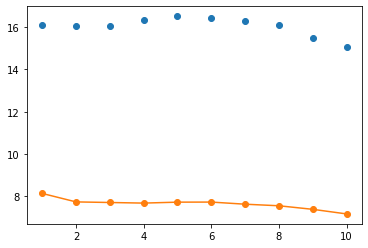

In [52]:
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
members = load_all_models(10)
print('Loaded %d models' % len(members))
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(members, i, X_test, y_test)
    # evaluate the i'th model standalone
    testy_enc = to_categorical(y_test)
    _, single_score = members[i-1].evaluate(X_test, testy_enc, verbose=0)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)
# summarize average accuracy of a single final model
print('RMSE of single models %.3f (%.3f)' % (np.mean(single_scores), np.std(single_scores)))
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
plt.plot(x_axis, single_scores, marker='o', linestyle='None')
plt.plot(x_axis, ensemble_scores, marker='o')
plt.show()

In [56]:
pred=ensemble_predictions(members,X_test)
for i in range(len(pred)):
    print(y_test[i],pred[i])

3/3 [==============================] - 0s 2ms/step
27.7052 [21.37239]
6.001 [7.4754972]
7.219047619 [13.6412]
13.21884615 [12.530542]
21.05416667 [12.609041]
17.78625 [13.766108]
5.134615385 [16.279646]
3.0 [5.4725943]
5.795 [13.113268]
31.11925926 [29.381458]
4.763809524 [8.115576]
11.76916667 [4.88676]
3.0 [6.3372107]
9.954 [7.520243]
15.2939726 [15.002805]
13.41823529 [20.022785]
10.79070423 [19.478588]
7.599090909 [16.845942]
0.9325 [1.7973408]
9.198 [6.57717]
12.60526316 [10.532103]
27.54 [8.028134]
23.97666667 [25.368042]
28.95888889 [29.824253]
9.0 [6.0285544]
8.033333333 [7.8992553]
25.194 [30.997715]
5.809166667 [12.727061]
27.96125 [15.579478]
21.95478261 [9.188393]
26.94153846 [27.935925]
10.1544 [7.482564]
13.12625 [20.38899]
6.0 [5.4725943]
23.96137255 [21.994564]
13.78428571 [12.092234]
0.0 [0.41236275]
4.625833333 [7.9237814]
3.76 [10.287603]
14.18461538 [4.693527]
7.312608696 [9.537498]
10.361 [27.89268]
4.7168 [8.311282]
23.16333333 [25.869556]
7.056666667 [29.301876]
